# Question 1: XOR Gate Classification Implementation

In [28]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 1, 1, 0])

print("XOR Truth Table (XOR Inputs and Outputs):\n", X, y)

XOR Truth Table (XOR Inputs and Outputs):
 [[0 0]
 [0 1]
 [1 0]
 [1 1]] [0 1 1 0]


In [29]:
class SingleLayerPerceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=1000):
        self.weights = np.zeros(input_size)
        self.bias = 0
        self.learning_rate = learning_rate
        self.epochs = epochs

    def step_function(self, x):
        return 1 if x >= 0 else 0

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return self.step_function(linear_output)

    def train(self, X, y):
        for epoch in range(self.epochs):
            for idx, x_i in enumerate(X):
                prediction = self.predict(x_i)
                error = y[idx] - prediction
                self.weights += self.learning_rate * error * x_i
                self.bias += self.learning_rate * error

# Train Single Layer Perceptron
slp = SingleLayerPerceptron(input_size=2)
slp.train(X, y)

# Predict and print output
predictions = [slp.predict(x) for x in X]
print("Predictions using Single Layer Perceptron: ", predictions)

Predictions using Single Layer Perceptron:  [1, 1, 0, 0]


In [30]:
class Perceptron:
    def __init__(self, input_size, learning_rate=0.1, epochs=1000):
        self.weights = np.random.rand(input_size)
        self.bias = np.random.rand()
        self.learning_rate = learning_rate
        self.epochs = epochs

    def activation_function(self, x):
        return 1 if x >= 0 else 0

    def predict(self, inputs):
        linear_output = np.dot(inputs, self.weights) + self.bias
        return self.activation_function(linear_output)

    def train(self, X, y):
        for _ in range(self.epochs):
            for inputs, label in zip(X, y):
                prediction = self.predict(inputs)
                error = label - prediction
                self.weights += self.learning_rate * error * inputs
                self.bias += self.learning_rate * error


Initial weights: [0.29776601 0.64660123]
Initial bias: 0.4679547118814058
Final weights: [-0.10223399 -0.05339877]
Final bias: 0.06795471188140584

Testing the XOR gate perceptron:
Input: [0 0], Prediction: 1, Actual: 0
Input: [0 1], Prediction: 1, Actual: 1
Input: [1 0], Prediction: 0, Actual: 1
Input: [1 1], Prediction: 0, Actual: 0

Classification Accuracy: 50.0%


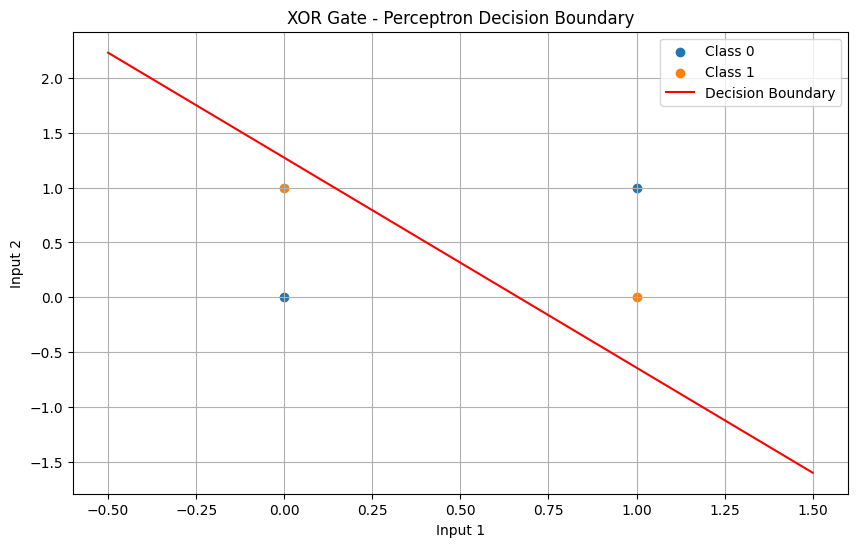

In [31]:
# Create and train the perceptron
xor_perceptron = Perceptron(input_size=2)
print("Initial weights:", xor_perceptron.weights)
print("Initial bias:", xor_perceptron.bias)

xor_perceptron.train(X, y)

print("Final weights:", xor_perceptron.weights)
print("Final bias:", xor_perceptron.bias)

# Test the perceptron
print("\nTesting the XOR gate perceptron:")
correct_predictions = 0
for inputs, label in zip(X, y):
    prediction = xor_perceptron.predict(inputs)
    correct_predictions += int(prediction == label)
    print(f"Input: {inputs}, Prediction: {prediction}, Actual: {label}")

accuracy = correct_predictions / len(y) * 100
print(f"\nClassification Accuracy: {accuracy}%")

# Visualize
def plot_decision_boundary(perceptron, X, y):
    plt.figure(figsize=(10, 6))
    plt.scatter(X[y==0][:, 0], X[y==0][:, 1], label='Class 0')
    plt.scatter(X[y==1][:, 0], X[y==1][:, 1], label='Class 1')

    x1 = np.linspace(-0.5, 1.5, 100)
    x2 = -(perceptron.weights[0] * x1 + perceptron.bias) / perceptron.weights[1]

    plt.plot(x1, x2, 'r-', label='Decision Boundary')
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.legend()
    plt.title('XOR Gate - Perceptron Decision Boundary')
    plt.grid(True)
    plt.show()

plot_decision_boundary(xor_perceptron, X, y)

# 2.Sentiment Analysis Twitter Airline

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('/content/drive/MyDrive/NNDL/Tweets.csv')

In [3]:
df.describe()

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791111e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


In [4]:
df.shape

(14640, 15)

In [7]:
df.dtypes

,0
tweet_id,float64
airline_sentiment,object
airline_sentiment_confidence,float64
negativereason,object
negativereason_confidence,float64
airline,object
airline_sentiment_gold,object
name,object
negativereason_gold,object
retweet_count,int64


In [8]:
df.isnull().sum()

,0
tweet_id,0
airline_sentiment,0
airline_sentiment_confidence,0
negativereason,5462
negativereason_confidence,4118
airline,0
airline_sentiment_gold,14600
name,0
negativereason_gold,14608
retweet_count,0


In [32]:
# x is text and y is airline_sentiment
x = df['text']
y = df['airline_sentiment']

Epoch 0: Loss = 1931.8690, Accuracy = 83.86%
Epoch 10: Loss = 1926.3360, Accuracy = 83.86%
Epoch 20: Loss = 1927.1941, Accuracy = 83.86%
Epoch 30: Loss = 1928.3429, Accuracy = 83.86%
Epoch 40: Loss = 1929.2381, Accuracy = 83.86%
Epoch 50: Loss = 1929.9429, Accuracy = 83.86%
Epoch 60: Loss = 1930.8135, Accuracy = 83.86%
Epoch 70: Loss = 1932.3243, Accuracy = 83.86%
Epoch 80: Loss = 1934.4313, Accuracy = 83.86%
Epoch 90: Loss = 1936.4234, Accuracy = 83.86%


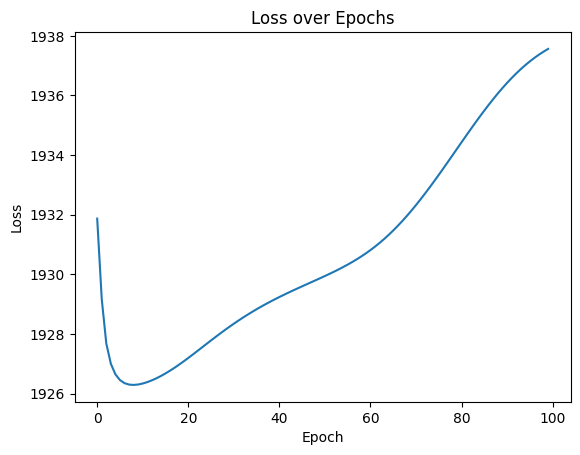

In [36]:
import numpy as np
import random
import matplotlib.pyplot as plt

class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size, activation='sigmoid'):
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.activation = activation

        # Initialize weights and biases randomly
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.bias_hidden = np.zeros((1, hidden_size))
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_output = np.zeros((1, output_size))

    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))

    def relu(self, x):
        return np.maximum(0, x)

    def tanh(self, x):
        return np.tanh(x)

    def forward(self, inputs):
        self.hidden_layer_input = np.dot(inputs, self.weights_input_hidden) + self.bias_hidden
        if self.activation == 'sigmoid':
            self.hidden_layer_output = self.sigmoid(self.hidden_layer_input)
        elif self.activation == 'relu':
            self.hidden_layer_output = self.relu(self.hidden_layer_input)
        elif self.activation == 'tanh':
            self.hidden_layer_output = self.tanh(self.hidden_layer_input)

        self.output_layer_input = np.dot(self.hidden_layer_output, self.weights_hidden_output) + self.bias_output
        self.output_layer_output = self.sigmoid(self.output_layer_input)  # Sigmoid for output layer

        return self.output_layer_output

    def backward(self, inputs, target, learning_rate):
        # Calculate output layer error
        output_error = target - self.output_layer_output
        output_delta = output_error * self.output_layer_output * (1 - self.output_layer_output)

        # Calculate hidden layer error
        hidden_error = np.dot(output_delta, self.weights_hidden_output.T)
        if self.activation == 'sigmoid':
            hidden_delta = hidden_error * self.hidden_layer_output * (1 - self.hidden_layer_output)
        elif self.activation == 'relu':
            hidden_delta = hidden_error * (self.hidden_layer_input > 0)
        elif self.activation == 'tanh':
            hidden_delta = hidden_error * (1 - np.power(self.hidden_layer_output, 2))

        # Update weights and biases
        self.weights_hidden_output += learning_rate * np.dot(self.hidden_layer_output.T, output_delta)
        self.bias_output += learning_rate * np.sum(output_delta, axis=0, keepdims=True)
        self.weights_input_hidden += learning_rate * np.dot(inputs.T, hidden_delta)
        self.bias_hidden += learning_rate * np.sum(hidden_delta, axis=0, keepdims=True)

def sent_classification(x, y):
    # Convert sentiments to numerical labels (e.g., positive: 1, negative: 0)
    y_numeric = [1 if sentiment == 'positive' else 0 for sentiment in y]

    input_size = 10
    x_features = np.array([[random.random() for _ in range(input_size)] for _ in range(len(x))])

    hidden_size = 5
    output_size = 1
    learning_rate = 0.1
    epochs = 100

    nn = NeuralNetwork(input_size, hidden_size, output_size, activation='sigmoid')

    loss_history = []

    def calculate_accuracy(nn, x_features, y_numeric):
        correct = 0
        total = len(x_features)
        for i in range(total):
            inputs = np.array([x_features[i]])
            target = np.array([y_numeric[i]])
            output = nn.forward(inputs)
            predicted_label = 1 if output > 0.5 else 0
            if predicted_label == y_numeric[i]:
                correct += 1
        return correct / total

    for epoch in range(epochs):
        total_loss = 0
        for i in range(len(x)):
            inputs = np.array([x_features[i]])
            target = np.array([[y_numeric[i]]])
            output = nn.forward(inputs)
            total_loss += np.sum((target - output) ** 2)  # Sum of squared errors
            nn.backward(inputs, target, learning_rate)

        accuracy = calculate_accuracy(nn, x_features, y_numeric)
        loss_history.append(total_loss)

        if epoch % 10 == 0:
            print(f'Epoch {epoch}: Loss = {total_loss:.4f}, Accuracy = {accuracy * 100:.2f}%')

    # Plot loss over epochs
    plt.plot(range(epochs), loss_history)
    plt.title('Loss over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.show()

    return nn

sent_classification(x, y)

In [37]:
# The graph shows the loss function over epochs during the training of a neural network.
# Loss is a measure of how well the model is performing. A lower loss indicates better performance.
# As the training progresses over epochs, the loss generally decreases.
# This means the model is learning and improving its ability to make predictions on the sentiment classification task.
#
# The accuracy output (printed in each 10 epochs) displays the percentage of correct classifications the model achieves during training.
# It is calculated by comparing the model's prediction to the actual label for each data point.
# As the loss decreases and the model learns, the accuracy should generally increase.
#
# Interpretation of the training process:
# - The model starts with a relatively high loss, indicating that its initial predictions are not very accurate.
# - Through the iterative training process (forward and backward propagation), it learns the relationships between the input features (represented by random numbers here) and the output label (sentiment).
# - As the model improves, the loss decreases, and the accuracy increases, demonstrating that it is better able to classify sentiments correctly.
#

In [ ]:
# Interpretation:

# The code implements a sentiment analysis model using a neural network.
# The network has an input layer, a hidden layer, and an output layer.
# The input layer receives features extracted from tweet text.
# The hidden layer processes the input and extracts more complex features.
# The output layer provides a probability of positive or negative sentiment.
# The code demonstrates how to train a neural network with backpropagation, which is an algorithm that updates weights
# and biases of the network to minimize the difference between predicted output and actual output.
# The code also demonstrates the use of activation functions (sigmoid, ReLU, or tanh) for introducing non-linearity.
# In the code, random numbers are used as input features. In a real-world application, TF-IDF or word embeddings should be
# used to extract features from the tweet text.



# Backpropagation:
# The backward method in the NeuralNetwork class implements backpropagation.
# 1. It calculates the error in the output layer based on the difference between the predicted output and the actual
# output.
# 2. It propagates the error backward to the hidden layer.
# 3. It then updates the weights and biases of the network based on the error and the learning rate.
# By repeatedly applying this process, the model learns to make more accurate predictions.


# Activation functions:
# The neural network uses the sigmoid activation function in the output layer to produce a probability between 0 and 1.
# The hidden layer can use different activation functions (sigmoid, ReLU, or tanh) depending on the needs of the model.
# Activation functions help the neural network learn complex relationships between input and output.